In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import machine learning tools
from sklearn.preprocessing import StandardScaler  
from sklearn.cluster import KMeans  
from sklearn.metrics import silhouette_score  

## Magnetic field data clustering

In [2]:
#loading the data from CSV
df_building = pd.read_csv('/workspaces/2nd_semester_project/notebooks/df_bikelane_weather.csv')
df_bikelane = pd.read_csv('/workspaces/2nd_semester_project/notebooks/df_bikelane_weather.csv')

In [3]:
# dropping observations with missing values in the radar columns
df_building = df_building.dropna(subset=['radar_0'])
df_bikelane = df_bikelane.dropna(subset=['radar_0'])

In [4]:
# Making a dataframe for the features we wish to cluster on
building_mag = df_building[["x","y","z"]]
bikelane_mag = df_bikelane[["x","y","z"]]

In [5]:
# Normalizing the data
scaler = StandardScaler()
building_mag_norm = scaler.fit_transform(building_mag)
bikelane_mag_norm = scaler.fit_transform(bikelane_mag)
# Clustering the magnetic field data with 2 clusters using kmeans
building_kmeans = KMeans(n_clusters=2, random_state=0).fit(building_mag_norm)
bikelane_kmeans = KMeans(n_clusters=2, random_state=0).fit(bikelane_mag_norm)

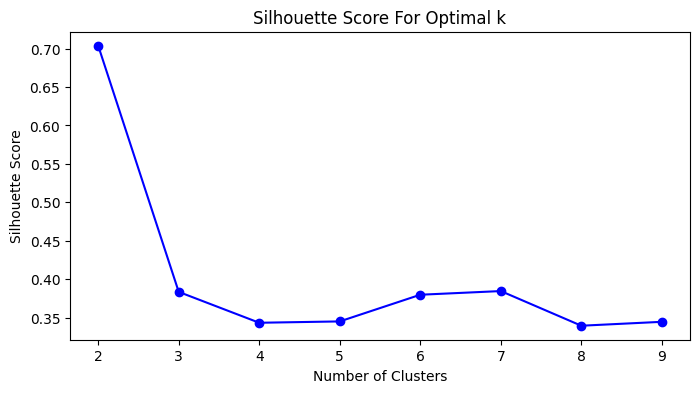

In [33]:
silhouette_avg = []
for k in range(2, 10):  # Starts from 2 clusters 
    kmeans = KMeans(n_clusters=k, random_state=0).fit(bikelane_mag_norm)
    cluster_labels = kmeans.labels_
    silhouette_avg.append(silhouette_score(bikelane_mag_norm, cluster_labels))

plt.figure(figsize=(8, 4))
plt.plot(range(2, 10), silhouette_avg, 'bo-')  # Adjust the range as needed
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score For Optimal k')
plt.show()

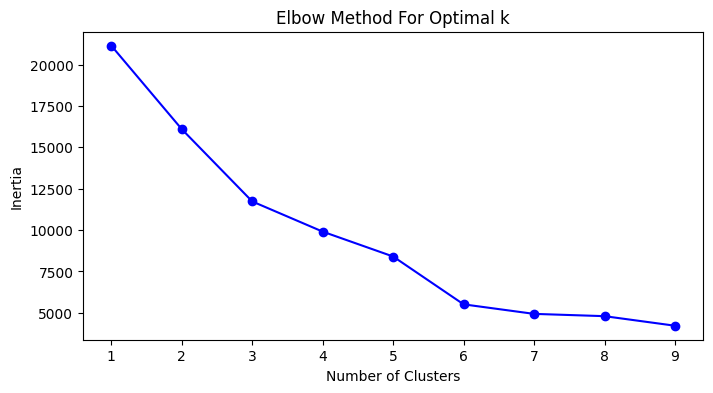

In [34]:
inertia = []
for k in range(1, 10):  
    kmeans = KMeans(n_clusters=k, random_state=0).fit(bikelane_mag_norm)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(range(1, 10), inertia, 'bo-') 
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

In [6]:
# Adding cluster labels to the mag dataframe
building_mag = building_mag.copy() #dealing with an error
bikelane_mag = bikelane_mag.copy() #dealing with an error
building_mag['mag_cluster'] = building_kmeans.labels_
bikelane_mag['mag_cluster'] = bikelane_kmeans.labels_
df_building = df_building.copy() #dealing with an error
df_bikelane = df_bikelane.copy() #dealing with an error
df_building['mag_cluster'] = building_mag['mag_cluster']
df_bikelane['mag_cluster'] = bikelane_mag['mag_cluster']

In [7]:
# Renaming the cluster labels to 'detection' and 'no_detection'
df_building['mag_cluster'].replace({0: 'no_detection', 1: 'detection'}, inplace=True)
df_bikelane['mag_cluster'].replace({0: 'no_detection', 1: 'detection'}, inplace=True)

In [8]:
# Fixing an error with the mag_cluster column type
df_building['mag_cluster'] = df_building['mag_cluster'].astype(str)
df_building['mag_cluster'].replace('nan', None, inplace=True)  # Replace 'nan' string with actual None
df_bikelane['mag_cluster'] = df_bikelane['mag_cluster'].astype(str)
df_bikelane['mag_cluster'].replace('nan', None, inplace=True)  # Replace 'nan' string with actual None

In [9]:
df_bikelane['mag_cluster'].value_counts()

mag_cluster
no_detection    6793
detection        253
Name: count, dtype: int64

# Clustering with radar data

In [10]:
# Making a dataframe for the features we wish to cluster on
building_radar = df_building[['radar_0', 'radar_1', 'radar_2', 'radar_3', 'radar_4', 'radar_5', 'radar_6', 'radar_7']]
bikelane_radar = df_bikelane[['radar_0', 'radar_1', 'radar_2', 'radar_3', 'radar_4', 'radar_5', 'radar_6', 'radar_7']]

In [27]:
# Normalizing the data
scaler = StandardScaler()
building_radar_norm = scaler.fit_transform(building_radar)
bikelane_radar_norm = scaler.fit_transform(bikelane_radar)
# Clustering the magnetic field data with 2 clusters using kmeans
building_kmeans = KMeans(n_clusters=2, random_state=0).fit(building_radar_norm)
bikelane_kmeans = KMeans(n_clusters=2, random_state=0).fit(bikelane_radar_norm)

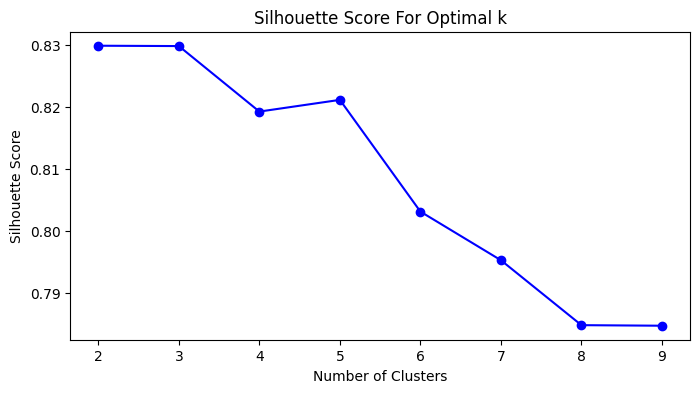

In [39]:
silhouette_avg = []
for k in range(2, 10):  # Starts from 2 clusters 
    kmeans = KMeans(n_clusters=k, random_state=0).fit(bikelane_radar_norm)
    cluster_labels = kmeans.labels_
    silhouette_avg.append(silhouette_score(bikelane_radar_norm, cluster_labels))

plt.figure(figsize=(8, 4))
plt.plot(range(2, 10), silhouette_avg, 'bo-')  # Adjust the range as needed
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score For Optimal k')
plt.show()

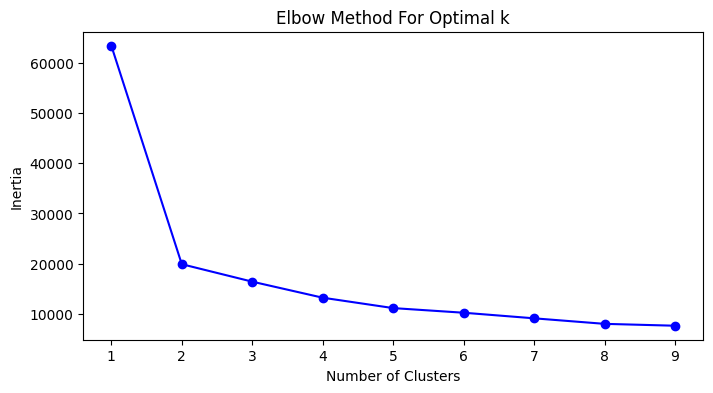

In [40]:
inertia = []
for k in range(1, 10):  
    kmeans = KMeans(n_clusters=k, random_state=0).fit(bikelane_radar_norm)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(range(1, 10), inertia, 'bo-') 
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

In [28]:
# Adding cluster labels to the radar dataframe
building_radar = building_radar.copy() #dealing with an error
bikelane_radar = bikelane_radar.copy() #dealing with an error
building_radar['radar_cluster'] = building_kmeans.labels_
bikelane_radar['radar_cluster'] = bikelane_kmeans.labels_
df_building = df_building.copy() #dealing with an error
df_bikelane = df_bikelane.copy() #dealing with an error
df_building['radar_cluster'] = building_radar['radar_cluster']
df_bikelane['radar_cluster'] = bikelane_radar['radar_cluster']

In [29]:
df_building['radar_cluster'].value_counts()

radar_cluster
0    5971
1    1075
Name: count, dtype: int64

## Comparing magnetic field clusters with radar clusters

In [30]:
# Comparing the clusters with the detection status
df_building.groupby(['radar_cluster', 'mag_cluster']).size()

radar_cluster  mag_cluster 
0              detection          2
               no_detection    5969
1              detection        251
               no_detection     824
dtype: int64

In [41]:
#Finding information about when the radar cluster is 1 and the magnetic cluster is no detection
df_isdiff_1 = df_building[(df_building['radar_cluster'] == 1) & (df_building['mag_cluster'] == 'no_detection')]
df_isdiff_2 = df_building[(df_building['radar_cluster'] == 1) & (df_building['mag_cluster'] == 'detection')]

In [42]:
df_isdiff_1


,time,battery,temperature,x,y,z,radar_0,radar_1,radar_2,radar_3,...,soil_temperature_7_to_28cm,soil_moisture_0_to_7cm,soil_moisture_7_to_28cm,date,hour,day_of_week,day_name,package_type_encoded,mag_cluster,radar_cluster
439,2024-03-04 08:30:29.478,3.04,3.750,-202,-172,-974,82.0,61.0,54.0,9.0,...,4.630500,0.272,0.271,2024-03-04,8,0,Monday,1,no_detection,1
440,2024-03-04 08:40:29.478,3.04,3.750,-205,-169,-970,82.0,61.0,54.0,9.0,...,4.630500,0.272,0.271,2024-03-04,8,0,Monday,1,no_detection,1
441,2024-03-04 08:50:29.478,3.04,3.875,-204,-169,-965,82.0,61.0,54.0,9.0,...,4.630500,0.272,0.271,2024-03-04,8,0,Monday,1,no_detection,1
442,2024-03-04 09:00:29.235,3.04,3.875,-204,-167,-969,86.0,62.0,55.0,9.0,...,4.630500,0.271,0.271,2024-03-04,9,0,Monday,1,no_detection,1
443,2024-03-04 09:10:29.235,3.04,3.875,-204,-168,-972,86.0,62.0,55.0,9.0,...,4.630500,0.271,0.271,2024-03-04,9,0,Monday,1,no_detection,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6979,2024-04-29 11:30:51.659,3.08,13.125,-292,-136,-377,54.0,31.0,28.0,50.0,...,9.080501,0.244,0.233,2024-04-29,11,0,Monday,1,no_detection,1
6980,2024-04-29 12:40:49.932,3.08,13.500,-298,-137,-368,52.0,29.0,26.0,55.0,...,9.280500,0.243,0.232,2024-04-29,12,0,Monday,1,no_detection,1
6981,2024-04-29 12:50:49.932,3.08,13.625,-301,-133,-371,52.0,29.0,26.0,55.0,...,9.280500,0.243,0.232,2024-04-29,12,0,Monday,1,no_detection,1
6982,2024-04-29 13:00:49.932,3.08,13.625,-300,-129,-367,52.0,29.0,26.0,55.0,...,9.430500,0.244,0.233,2024-04-29,13,0,Monday,1,no_detection,1


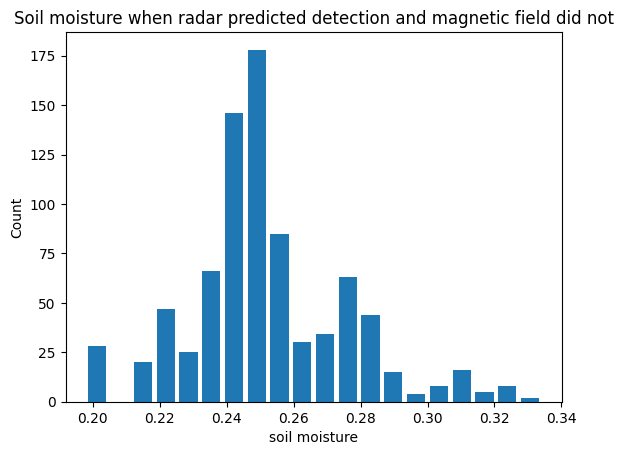

In [58]:
plt.hist(df_isdiff_1['soil_moisture_0_to_7cm'], bins =20, histtype='bar', rwidth=0.8)
plt.title('Soil moisture when radar predicted detection and magnetic field did not')
plt.xlabel('soil moisture')
plt.ylabel('Count')
plt.show()

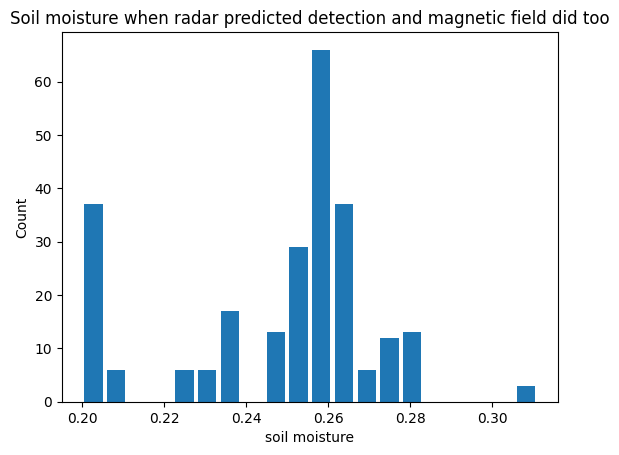

In [59]:
plt.hist(df_isdiff_2['soil_moisture_0_to_7cm'], bins =20, histtype='bar', rwidth=0.8)
plt.title('Soil moisture when radar predicted detection and magnetic field did too')
plt.xlabel('soil moisture')
plt.ylabel('Count')
plt.show()

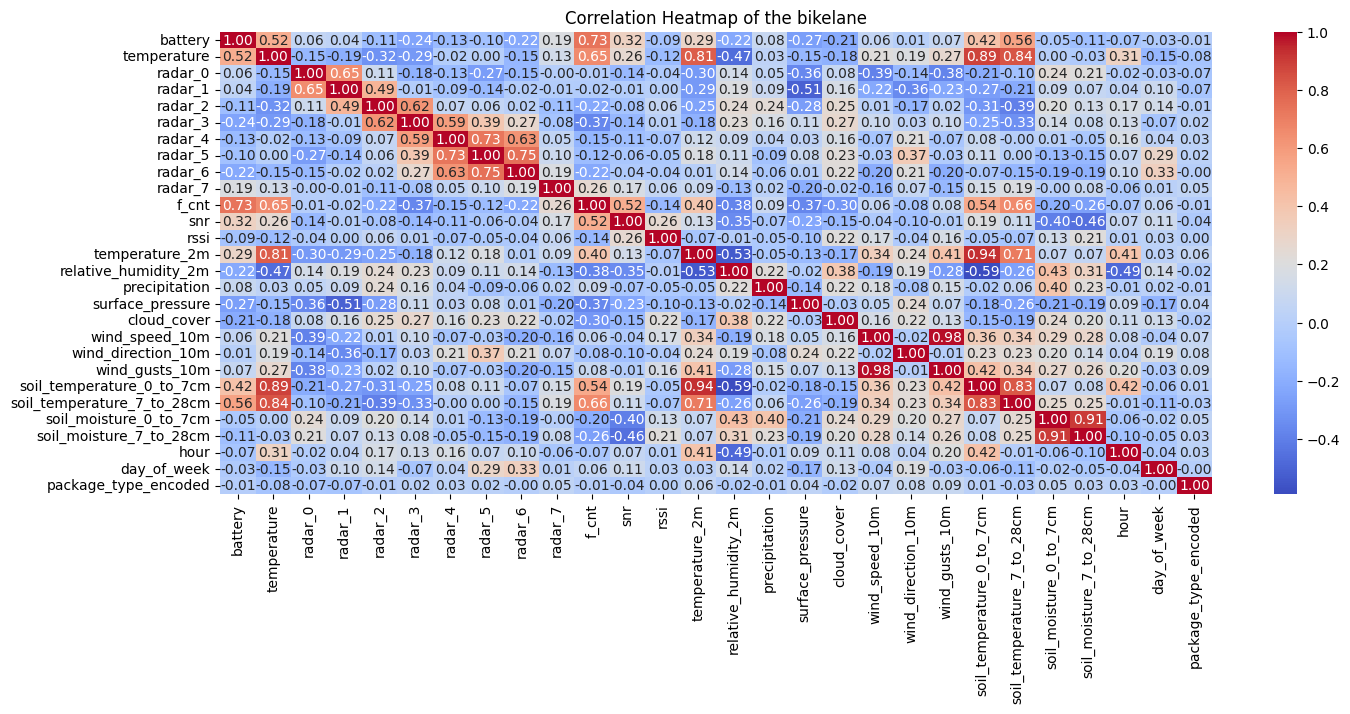

In [21]:
# Calculating correlation matrix with all the values that are not categorical
correlation_matrix_1 = df_isdiff_1[['battery', 'temperature', 'radar_0', 'radar_1', 'radar_2', 'radar_3', 'radar_4', 'radar_5', 'radar_6', 'radar_7', 'f_cnt', 'snr', 'rssi', "temperature_2m", "relative_humidity_2m", "precipitation", "surface_pressure", "cloud_cover", "wind_speed_10m", "wind_direction_10m", "wind_gusts_10m", "soil_temperature_0_to_7cm", "soil_temperature_7_to_28cm", "soil_moisture_0_to_7cm", "soil_moisture_7_to_28cm", 'hour', 'day_of_week', 'package_type_encoded']].corr()

# Plotting heatmap
plt.figure(figsize=(16, 6))
sns.heatmap(correlation_matrix_1, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of the bikelane')
plt.show()

In [63]:
df_isdiff_1['relative_humidity_2m'].describe()

count    824.000000
mean      74.831818
std       15.061166
min       37.033573
25%       67.363224
50%       76.067726
75%       85.860330
max       99.636140
Name: relative_humidity_2m, dtype: float64

In [64]:
df_isdiff_2['relative_humidity_2m'].describe()

count    251.000000
mean      82.027682
std       11.884368
min       48.362087
25%       75.291700
50%       81.228990
75%       92.385850
max      100.000000
Name: relative_humidity_2m, dtype: float64